1) Delivery_time -> Predict delivery time using sorting time 


------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data=df.copy()

## EDA

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.shape

(21, 2)

In [8]:
data[data.duplicated()].shape

(0, 2)

<AxesSubplot:>

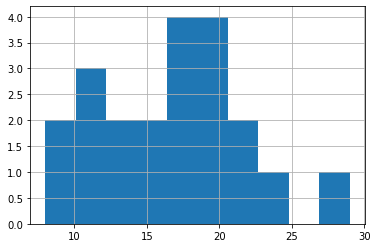

In [9]:
data['Delivery Time'].hist()

<AxesSubplot:>

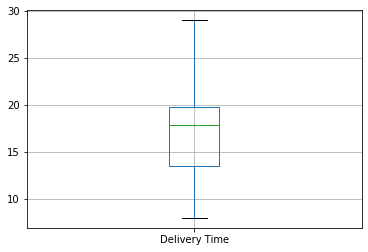

In [10]:
data.boxplot(column='Delivery Time')

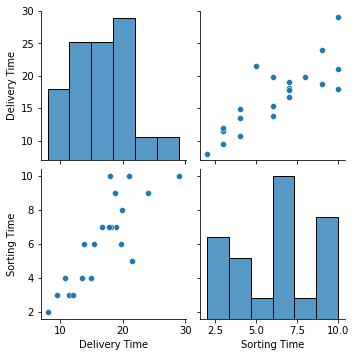

In [11]:
sns.pairplot(data)

In [12]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

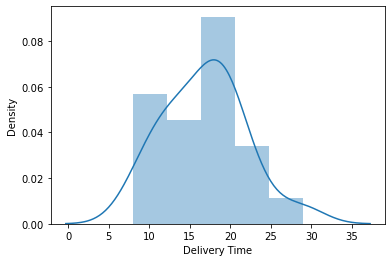

In [13]:
sns.distplot(data['Delivery Time'])

 ## Fitting Model

In [14]:
import statsmodels.formula.api as smf

In [15]:
model=smf.ols('Q("Delivery Time")~Q("Sorting Time")',data=data).fit()

In [16]:
model.params

Intercept            6.582734
Q("Sorting Time")    1.649020
dtype: float64

In [17]:
model.pvalues

Intercept            0.001147
Q("Sorting Time")    0.000004
dtype: float64

In [18]:
print(model.tvalues,"\n",model.pvalues)

Intercept            3.823349
Q("Sorting Time")    6.387447
dtype: float64 
 Intercept            0.001147
Q("Sorting Time")    0.000004
dtype: float64


In [23]:
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


## Predicting model for Delivery time

In [24]:
y_pred=model.predict(data)

## Square, Square root, Log etc func.

In [42]:
def square(x):
    return x**2

In [48]:
print(square(df['Delivery Time']))

0     441.0000
1     182.2500
2     390.0625
3     576.0000
4     841.0000
5     235.6225
6     361.0000
7      90.2500
8     320.4100
9     351.5625
10    393.2289
11    115.5625
12    278.2224
13    132.2500
14    144.7209
15    221.4144
16    189.0625
17    327.9721
18     64.0000
19    317.9089
20    462.2500
Name: Delivery Time, dtype: float64


In [28]:
df.insert(len(df.columns), 'A_Sqrt',
         np.sqrt(df.iloc[:,0]))

In [40]:
df.head()

,Delivery Time,Sorting Time,A_Sqrt,log_values
0,21.00,10,4.582576,3.044522
1,13.50,4,3.674235,2.602690
2,19.75,6,4.444097,2.983153
3,24.00,9,4.898979,3.178054
4,29.00,10,5.385165,3.367296


In [32]:
df.insert(len(df.columns),'log_values',
np.log(df['Delivery Time']))

In [39]:
df.head()

,Delivery Time,Sorting Time,A_Sqrt,log_values
0,21.00,10,4.582576,3.044522
1,13.50,4,3.674235,2.602690
2,19.75,6,4.444097,2.983153
3,24.00,9,4.898979,3.178054
4,29.00,10,5.385165,3.367296


## MSE, RMSE

In [35]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y,y_pred)

In [36]:
MSE

7.793311548584063

In [38]:
RMSE=np.sqrt(MSE)
RMSE

2.7916503270617654